In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/KNN_Project_Data",index_col=0)

In [ ]:
df.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


EDA

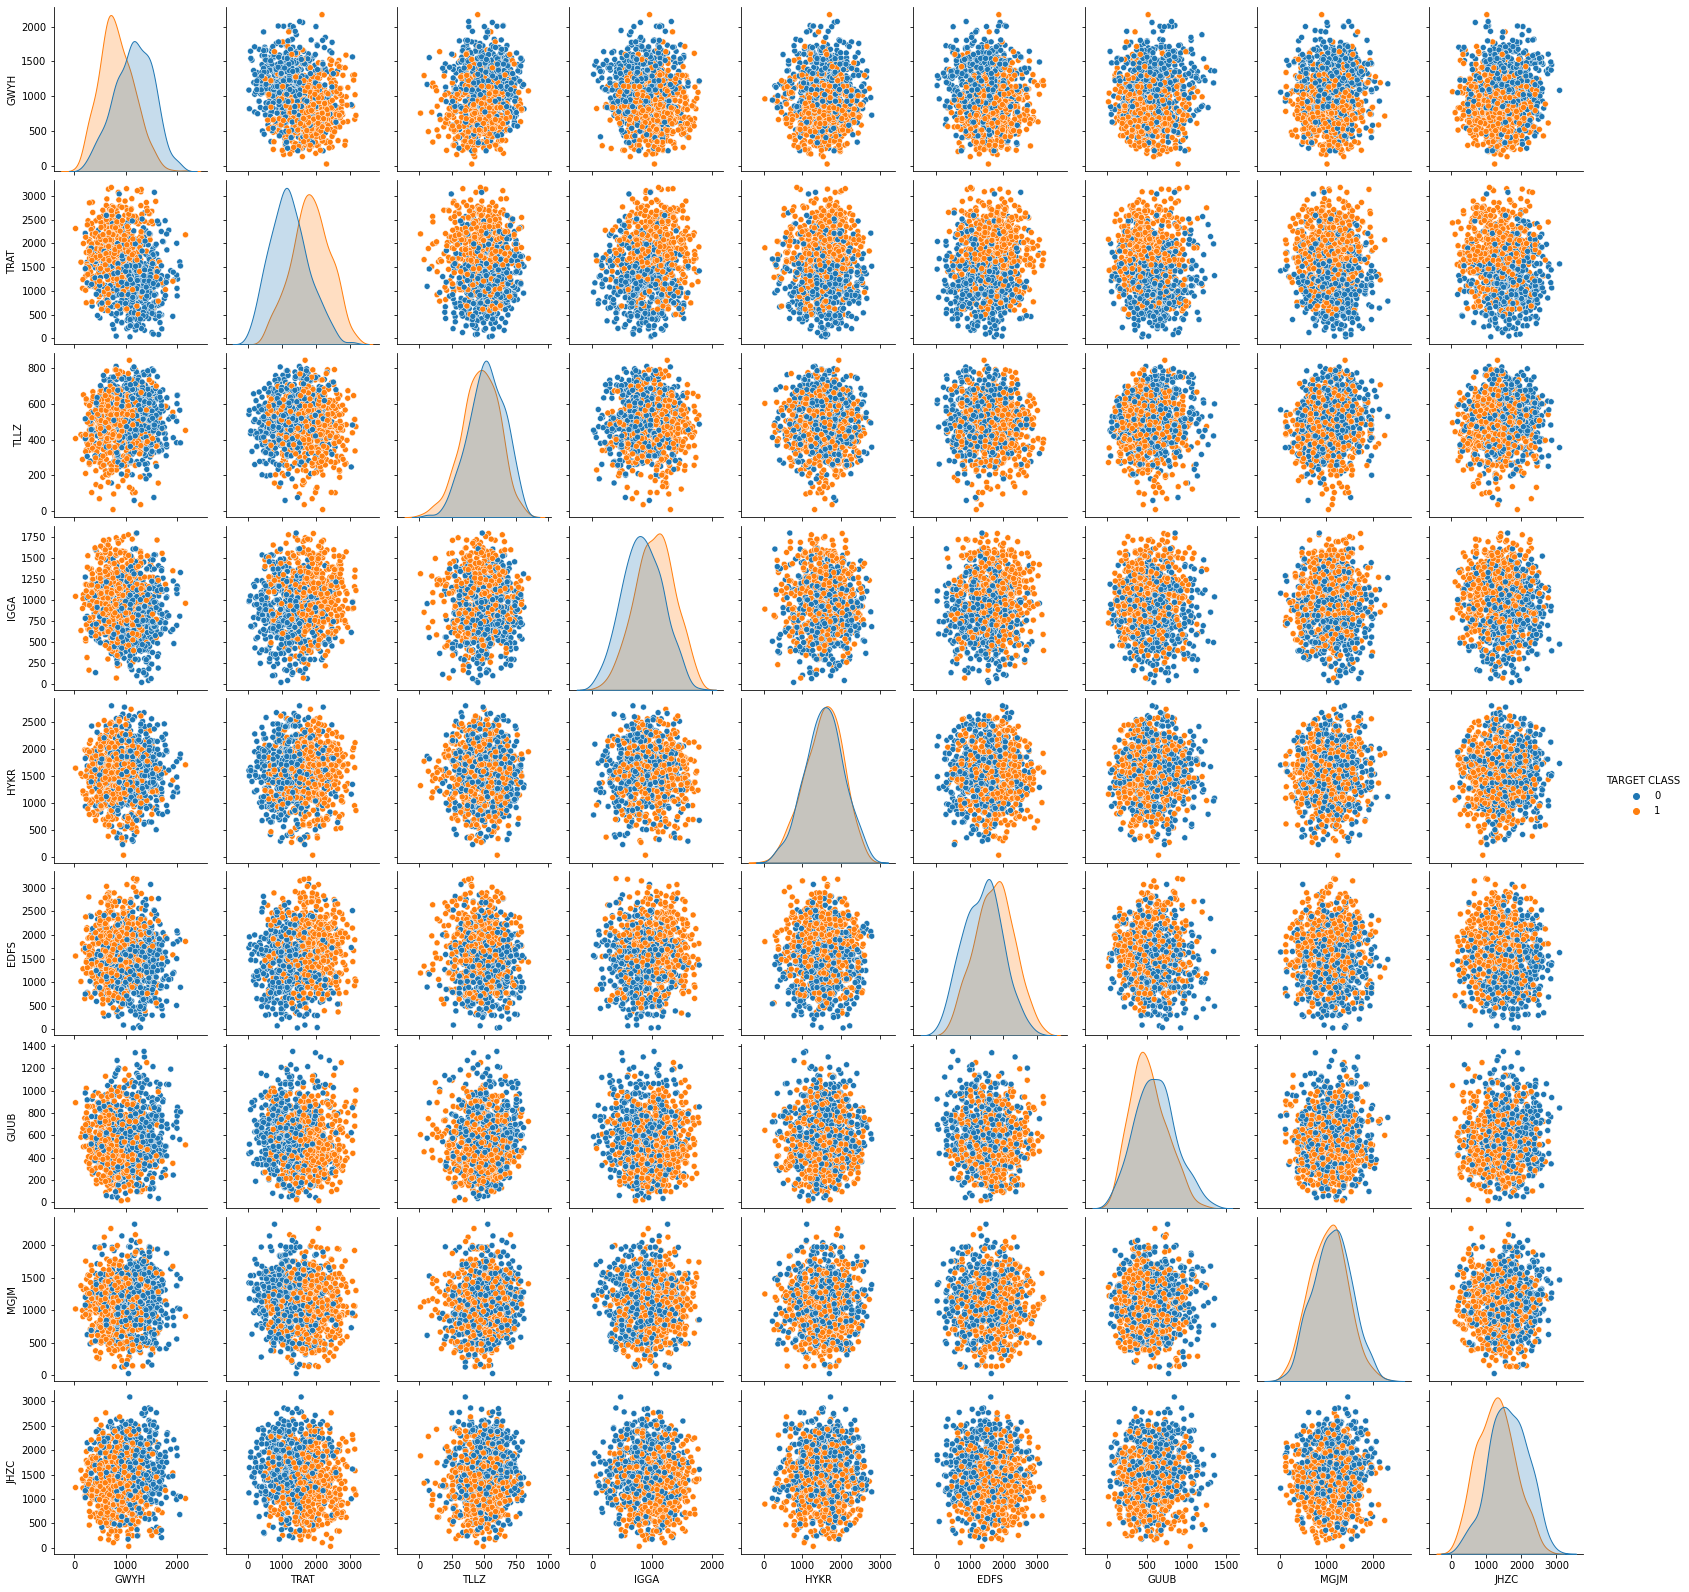

In [ ]:
sns.pairplot(df,hue='TARGET CLASS')

SATNADRDIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [ ]:
scaled_features

array([[-0.44343461,  1.61980773, -0.9582548 , ..., -0.93279392,
         1.00831307, -1.06962723],
       [-1.05657361,  1.7419175 , -1.50422015, ..., -0.46186435,
         0.25832069, -1.04154625],
       [-0.43698145,  0.77579285,  0.21339413, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.97901454,  0.83771499,  0.01401811, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [-0.99239881,  0.0303711 ,  1.06295359, ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.79510909,  1.12180047,  1.18594424, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1]) 

In [ ]:
df.columns[:-1]

Index(['GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM', 'JHZC'], dtype='object')

In [ ]:
df_feat.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X=df_feat
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Predictions and Evaluations

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,predictions))

[[105  47]
 [ 39 109]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       152
           1       0.70      0.74      0.72       148

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



CHOOSING RIGHT K VALUE

In [ ]:
error_rate = []


for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

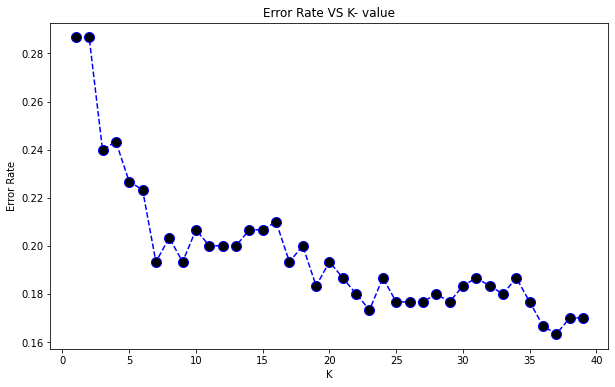

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='black',markersize=10)
plt.title('Error Rate VS K- value')
plt.xlabel('K')
plt.ylabel('Error Rate')

RETRAIN THE MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [ ]:
predictions = knn.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[125  27]
 [ 28 120]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       152
           1       0.82      0.81      0.81       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

